In [5]:
from sklearn.datasets import load_iris, load_wine,load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score 

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree  # xgb.plot_tree() 메쏘드에 XGBoost 모형객체를 넣어 의사결정트리를 시각화할 수 있다.

import graphviz  # 의사결정나무 시각화를 위해서 graphviz 라이브러리 설치가 필요
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import numpy as np

## XGBooster 파이썬에서 직접 라이브러릴 사용하는 **방법**

In [44]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer .data, cancer .target, test_size=0.2, random_state=123)

# 파이썬에서 사용되는 XGBooster은 자기 고유의 DMatric라는 클래스를 가지고 있다.
dtrain = xgb.DMatrix(data = X_train, label = y_train) #데이터들을 DMatrix에 넣어줘야 한다. 
dtest = xgb.DMatrix(data = X_train, label = y_test)  #데이터들을 DMatrix에 넣어줘야 한다. 

In [45]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping':100
}
num_rounds = 400

In [46]:
evals = [(dtrain, 'train'),(dtest, 'eval')]
xgb_model = xgb.train(params =params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=evals)

XGBoostError: ignored

In [43]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

NameError: ignored

In [ ]:
preds = [1 if x > 0.5] else 0 for x in predicts]
print(preds[:10])

In [ ]:
print("accuracy_score: {}".format(accuracy_score(y_test, predicts)))
print("precision_score: {}".format(precision_score(y_test, predicts)))
print("recall_score:{}".format(recall_score(y_test, predicts)))



## sklearn에서 호환되는 XBGbooster 

In [47]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris .data, iris .target, test_size=0.2, random_state=123)

In [48]:
xgbc = XGBClassifier(m_estimater = 400, learning_rate=0.1, max_depth=5)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
pred_proba = xgbc.predict_proba(X_test)[:,1]

In [49]:
cross_val = cross_validate(
    estimator = xgbc,
    X=iris.data, y = iris.target,
    cv=5
)

print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg test score: 0.96 (+/- 0.024944382578492935)


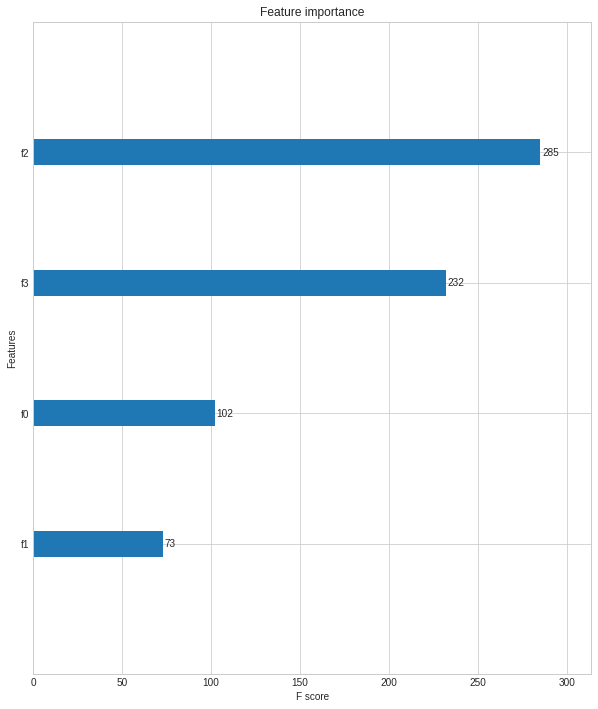

In [50]:
fig, ax = plt.subplots(figsize =(10,12))
plot_importance(xgbc, ax=ax);

###  Tree -feature load map

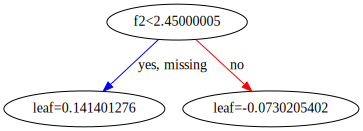

In [51]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

# featruee f2가 가장 중요한 기준으로 나왔으니까, f2를 기준으로 2.4보다 작냐 아니냐